# Titanic dataset solution

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Load the data
df_train = pd.read_csv('ttrain.csv')
df_test = pd.read_csv('ttest.csv')

In [41]:
# Check the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
df_combined = pd.concat([df_train, df_test], sort=False)

In [44]:
df_combined.shape

(1309, 12)

In [45]:
df_combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [46]:
df_combined.Fare.mean(), df_combined.Fare.median(), df_combined.Fare.mode(), df_combined.Fare.std(),    df_combined.Fare.max(), df_combined.Fare.min()

(33.29547928134557,
 14.4542,
 0    8.05
 Name: Fare, dtype: float64,
 51.75866823917414,
 512.3292,
 0.0)

In [47]:
df_combined.Fare.value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [48]:
df_combined.Fare.fillna(df_combined.Fare.median(), inplace=True)

<Axes: xlabel='Embarked', ylabel='count'>

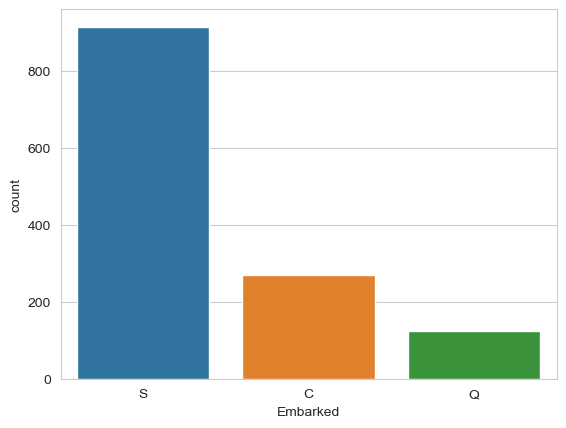

In [49]:
import seaborn as sns
sns.countplot(x='Embarked', data=df_combined)

In [50]:
df_combined.Embarked.fillna('S', inplace=True)

In [51]:
df_combined.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [52]:
del df_combined['Cabin']
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [53]:
df_combined['Title'] = df_combined.Name.str.extract(' ([A-Za-z]+)\.', expand=True)
df_combined['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [54]:
df_combined.Title.replace(['Ms', 'Mlle'], 'Miss', inplace=True)
df_combined.Title.replace(['Mme', 'Countess','Lady','Dona'], 'Mrs', inplace=True)
df_combined.Title.replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Mr', inplace=True)
df_combined.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [55]:
df_combined = df_combined.drop(['Name'], axis=1)

In [56]:
df_combined.Age.fillna(df_combined.groupby('Title')['Age'].transform('median'), inplace=True)
df_combined.Age.value_counts()

Age
30.0    217
22.0     94
24.0     47
21.0     41
18.0     39
       ... 
23.5      1
20.5      1
55.5      1
66.0      1
38.5      1
Name: count, Length: 99, dtype: int64

In [61]:
df_combined[df_combined.Title == 'Master'].Age

In [62]:

df_combined.Age = df_combined.Age.astype(int)

In [60]:
df_combined.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [63]:
df_combined.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024291,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.076476,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386960,0.060832,0.018322,-0.558683
Age,0.024291,-0.076476,-0.386960,1.000000,-0.216190,-0.133246,0.176824
SibSp,-0.055224,-0.035322,0.060832,-0.216190,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.133246,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.176824,0.160349,0.221635,1.000000


In [64]:
del df_combined['Ticket']
del df_combined['PassengerId']
# del df_combined['Fare']

In [65]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [66]:
df_combined = pd.get_dummies(df_combined, drop_first=True)

In [67]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   int64  
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Sex_male    1309 non-null   bool   
 7   Embarked_Q  1309 non-null   bool   
 8   Embarked_S  1309 non-null   bool   
 9   Title_Miss  1309 non-null   bool   
 10  Title_Mr    1309 non-null   bool   
 11  Title_Mrs   1309 non-null   bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 79.3 KB


In [68]:
df_combined.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35,0,0,8.0500,True,False,True,False,True,False


In [69]:
df_train = df_combined[:891]
df_test = df_combined[891:]


In [75]:
x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [77]:
d = DecisionTreeClassifier()

In [80]:
del df_test['Survived']
model = d.fit(x, y)

In [81]:
pred = model.predict(df_test)

In [83]:
pred

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [86]:
df_result = pd.read_csv('ttest.csv')
df_result = df_result[['PassengerId']]
df_result

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [88]:
df_result['Survived'] = pred
df_result

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [90]:
df_result.Survived= df_result.Survived.astype('int64')

In [91]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [92]:
df_result.to_csv('titanic_result.csv', index=False)


In [93]:
## Random Forest

In [94]:
r = RandomForestClassifier()
modelr= r.fit(x, y)
predr = modelr.predict(df_test)
df_result2 = pd.read_csv('ttest.csv')
df_result2 = df_result2[['PassengerId']]
df_result2['Survived'] = predr
df_result2.Survived= df_result2.Survived.astype('int64')
df_result2.to_csv('titanic_result2.csv', index=False)

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [96]:
b = BernoulliNB()
modelb = b.fit(x, y)
predb = modelb.predict(df_test)
df_result3 = pd.read_csv('ttest.csv')
df_result3 = df_result3[['PassengerId']]
df_result3['Survived'] = predb
df_result3.Survived= df_result3.Survived.astype('int64')
df_result3.to_csv('titanic_result3.csv', index=False)
